In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('flights_clean.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
1,2008,1,3,4,19:37,18:30,20:37,19:40,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
2,2008,1,3,4,16:44,15:10,18:45,17:25,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0
4,2008,1,3,4,13:23,12:55,15:26,15:10,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0


In [7]:
# miramos los indices donde el valor de AirTime is < 10 min
indices = df[df['AirTime'] < 10 ].index
print(indices)

Int64Index([  18382,   32530,   33250,   33260,   33261,   33262,   33266,
              33986,   35608,   40475,  109581,  122795,  151302,  153645,
             161742,  221611,  237091,  237100,  237856,  238712,  271821,
             272737,  283857,  288388,  290373,  292613,  292829,  325734,
             363921,  364174,  364313,  364822,  368166,  409272,  464811,
             465221,  504598,  562282,  562806,  591830,  594291,  594973,
             607957,  643655,  659229,  692905,  693107,  693948,  694249,
             734555,  736986,  739660,  769985,  811669,  811881,  812305,
             812337,  812967,  813399,  813453,  818035,  851766,  858398,
             879833,  880826,  890129,  900005,  912646,  913223,  913360,
             913670,  913747,  913828,  915452,  941567,  978990,  979028,
             979040,  979352, 1098233, 1098297, 1218768, 1231561, 1231565,
            1232287],
           dtype='int64')


In [8]:
# elimino estos indice en particular
df.drop(indices, inplace = True) 

### Nivell 1

# Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

## Exploratori Data Analysis (EDA)

In [9]:
y = target = df['ArrDelay']
print(y.shape)

(1247399,)


+ quines variables fem servir pels features (X)?

In [10]:
df_subset = pd.DataFrame()

In [11]:
df_subset['suma_delays'] = df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum(axis=1)

In [12]:
df_subset['difference_delays'] = df_subset['suma_delays'] - target

<AxesSubplot:xlabel='suma_delays', ylabel='difference_delays'>

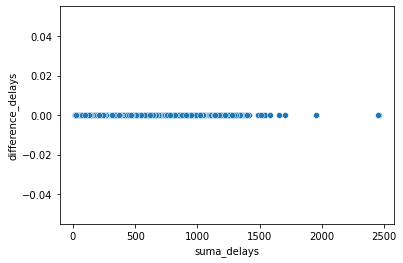

In [13]:
sns.scatterplot(x='suma_delays',y='difference_delays',data=df_subset)

In [14]:
np.any(df_subset.difference_delays == 0)

True

+ la suma_delays es el mateix que ArrDelay, puc eliminar aquestes variables

In [15]:
df_subset_2 = pd.DataFrame()

In [16]:
df_subset_2['suma_air_taxis'] = df[['AirTime','TaxiIn','TaxiOut']].sum(axis=1)
df_subset_2['ActualElapsedTime'] = df['ActualElapsedTime']

In [17]:
df_subset_2['difference_air'] = df_subset_2['suma_air_taxis'] - df_subset_2['ActualElapsedTime']
df_subset_2

,suma_air_taxis,ActualElapsedTime,difference_air
0,90.0,90.0,0.0
1,240.0,240.0,0.0
2,121.0,121.0,0.0
3,228.0,228.0,0.0
4,123.0,123.0,0.0
...,...,...,...
1247481,111.0,111.0,0.0
1247482,43.0,43.0,0.0
1247483,147.0,147.0,0.0
1247484,127.0,127.0,0.0


<AxesSubplot:xlabel='suma_air_taxis', ylabel='difference_air'>

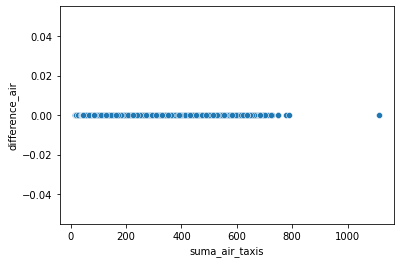

In [18]:
sns.scatterplot(x='suma_air_taxis',y='difference_air',data=df_subset_2)

+ la suma de AirTime i els Taxis es el mateix que ActualElapsedTime i  puc eliminar aquestes variables

In [19]:
df.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],axis=1,inplace=True)

In [20]:
df.drop(columns=['AirTime','TaxiIn','TaxiOut'],axis=1,inplace=True)

In [21]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
1,2008,1,3,4,19:37,18:30,20:37,19:40,WN,509,N763SW,240.0,250.0,57.0,67.0,IND,LAS,1591
2,2008,1,3,4,16:44,15:10,18:45,17:25,WN,1333,N334SW,121.0,135.0,80.0,94.0,IND,MCO,828
3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,675,N286WN,228.0,240.0,15.0,27.0,IND,PHX,1489
4,2008,1,3,4,13:23,12:55,15:26,15:10,WN,4,N674AA,123.0,135.0,16.0,28.0,IND,TPA,838


In [24]:
# mirem variables numeriques
X = df[['Month','DayofMonth','DayOfWeek','ActualElapsedTime','CRSElapsedTime','DepDelay','Distance']]
print(X.shape)

(1247399, 7)


In [25]:
X.head()

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,DepDelay,Distance
0,1,3,4,90.0,90.0,34.0,515
1,1,3,4,240.0,250.0,67.0,1591
2,1,3,4,121.0,135.0,94.0,828
3,1,3,4,228.0,240.0,27.0,1489
4,1,3,4,123.0,135.0,28.0,838


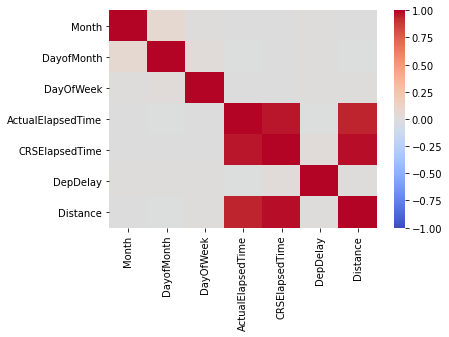

In [26]:
# existeix alguna correlació entre aquestes variables numeriques?
corr = X.corr()
sns.heatmap(corr,cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

+ hem de seleccionar aquelles variables independents i que tinguin poca correlacio entre elles al model final. Si no fos aixi s'introdueix error al modelatge
+ ActualElapsedTime and CRSElapsedTime estan molt relacionades (una es el valor real i l'altre el esperat)
+ ActualElapsedTime i Distance tambe estan molt relaciondes : speed = Distance/ActualElapsedTime


<AxesSubplot:xlabel='ActualElapsedTime', ylabel='CRSElapsedTime'>

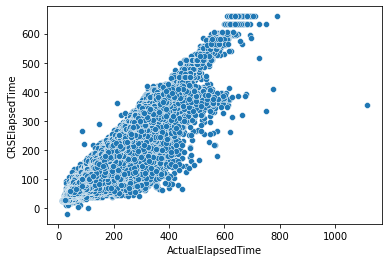

In [27]:
# visualitzem la relacio entre aquestes dues variables relacionades
sns.scatterplot(x='ActualElapsedTime',y = 'CRSElapsedTime',data=X)

+ Despres ja farem un FEATURE ENGINEERING per corregir aixo

<AxesSubplot:xlabel='Distance', ylabel='ActualElapsedTime'>

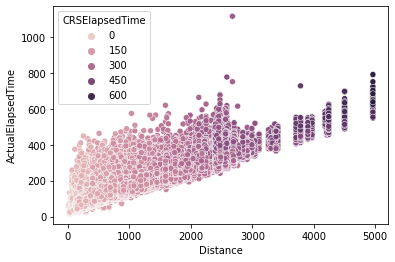

In [28]:
sns.scatterplot(x='Distance', y='ActualElapsedTime',hue='CRSElapsedTime',data=X)

+ Speed  = Distance/CRSElapsedTime 

+ Despres ja farem FEATURE ENGINEERING

In [29]:
X.describe().round(2)

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,DepDelay,Distance
count,1247399.00,1247399.00,1247399.00,1247399.00,1247399.00,1247399.00,1247399.00
mean,6.07,15.73,3.98,135.38,131.77,59.68,741.63
std,3.51,8.79,1.99,72.29,69.53,59.87,559.36
min,1.00,1.00,1.00,15.00,-21.00,6.00,11.00
25%,3.00,8.00,2.00,83.00,80.00,24.00,334.00
50%,6.00,16.00,4.00,118.00,115.00,41.00,595.00
75%,9.00,23.00,6.00,167.00,161.00,75.00,972.00
max,12.00,31.00,7.00,1114.00,660.00,2467.00,4962.00


+ veiem que DepDelay o distance tenen desviacions grans

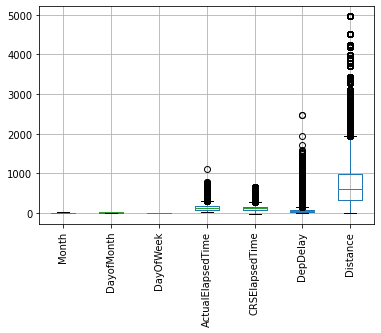

In [30]:
# anem a mirar si hi han molts outliers dins de cada columna
box = X.boxplot(rot=90)

In [33]:
df[df['Distance']>4900]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
114923,2008,1,11,5,13:44,13:20,19:47,19:20,CO,15,N78060,663.0,660.0,27.0,24.0,EWR,HNL,4962
115545,2008,1,20,7,13:32,13:20,19:39,19:20,CO,15,N67052,667.0,660.0,19.0,12.0,EWR,HNL,4962
115555,2008,1,22,2,14:41,13:20,20:16,19:20,CO,15,N78060,635.0,660.0,56.0,81.0,EWR,HNL,4962
115762,2008,1,23,3,14:40,13:20,19:54,19:20,CO,15,N68061,614.0,660.0,34.0,80.0,EWR,HNL,4962
115862,2008,1,4,5,13:39,13:20,19:40,19:20,CO,15,N66057,661.0,660.0,20.0,19.0,EWR,HNL,4962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242818,2008,12,11,4,15:03,13:35,20:28,19:35,CO,15,N59053,625.0,660.0,53.0,88.0,EWR,HNL,4962
1243641,2008,12,8,1,01:04,20:55,16:19,11:20,CO,14,N68061,615.0,565.0,299.0,249.0,HNL,EWR,4962
1243698,2008,12,7,7,14:35,13:35,20:12,19:35,CO,15,N68061,637.0,660.0,37.0,60.0,EWR,HNL,4962
1243967,2008,12,3,3,14:41,13:35,20:05,19:35,CO,15,N67052,624.0,660.0,30.0,66.0,EWR,HNL,4962


+ tot i que hi han outliers no els trec perque per exemple un vol amb una distancia molt llarga (considerat outlier) no significa que sigui una anomalia. Aquests vols van de EWR ->NEWARK (NEW YORK) a HNL->HONOLULU (HAWAI) o viceversa

+ de la mateixa manera cada columna te els seus outliers pero s'hauria de mirar un a un si es treuen o no

In [34]:
#save this clean data for future references
df.to_csv('flights_clean_v2.csv', index = False)

#### faig servir totes les dades per aquest primer exercici

In [35]:
# model de regressio 1: lineal
from sklearn.linear_model import LinearRegression
# metode lineal basat en Ordinary Least Squares (OLS)
linear_model = LinearRegression()

[-0.00000000e+00 -0.00000000e+00  0.00000000e+00  9.92717681e-01
 -9.85931050e-01  9.99349085e-01 -8.23063342e-04]


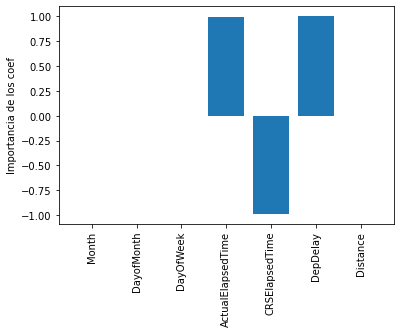

In [36]:
# model de regressio 2: Lasso Regressor
# model lineal pero que penalitza incloure moltes variables o variables amb coficients grans
# LASSO regression is a variation of linear regression specifically adapted for data that shows
# heavy multicollinearity (heavy correlation of features with each other). 
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X,y)
print(lasso_model.coef_)
plt.bar(X.columns,lasso_model.coef_)
plt.xticks(rotation=90)
plt.ylabel('Importancia de los coef')
plt.show()

+ Month, DayofMonth DayofWeek or Distance o AirTime no semblen tener importancia per predir ArrDelay

In [37]:
# check if the target is within the features to avoid modeling
'ArrDelay' in X.columns

False

In [38]:
# model de regressio 3: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()

# Exercici 2

Compara’ls en base al MSE i al R2 .

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [40]:
modelos = [linear_model,lasso_model,decision_tree_model]
for model in modelos:
    model.fit(X,y)
    y_pred = model.predict(X)    
    R2 = r2_score(y,y_pred) 
    mse = MSE(y,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')    

modelo: LinearRegression() R2 score: 0.9999999978280454, MSE: 8.01660734471762e-06
modelo: Lasso() R2 score: 0.9999929384739433, MSE: 0.02606384211021025
modelo: DecisionTreeRegressor() R2 score: 1.0, MSE: 0.0


### com es possible que surti R2 score proper a 1? overfitting per no separar train/test sets?

# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [41]:
# find the best alpha parameter
from sklearn.linear_model import LassoCV
alpha = np.logspace(-8, 2, 10)
print(alpha)
lasso_model = LassoCV(alphas=alpha)
lasso_model.fit(X, y)
print(f'the best alpha is {lasso_model.alpha_}')


[1.00000000e-08 1.29154967e-07 1.66810054e-06 2.15443469e-05
 2.78255940e-04 3.59381366e-03 4.64158883e-02 5.99484250e-01
 7.74263683e+00 1.00000000e+02]
the best alpha is 1e-08


In [42]:
linear = LinearRegression()
lasso = Lasso(alpha=1E-8) # if normalize =True all variable are in the same scale
tree = DecisionTreeRegressor(criterion='mse',max_depth= 10,min_samples_leaf=5)
# for tree, the higher the max_depth can lead to OVERFITTING...

In [43]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X,y)
    y_pred = model.predict(X)    
    R2 = r2_score(y,y_pred) 
    mse = MSE(y,y_pred)
    
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    

modelo: LinearRegression() R2 score: 0.9999999978280454, MSE: 8.01660734471762e-06
modelo: Lasso(alpha=1e-08) R2 score: 0.9999997356785904, MSE: 0.0009756009442333422
modelo: DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) R2 score: 0.964655752718519, MSE: 130.4543625915818


+ Al canviar els parametres podem empitjorar els results 

# Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)



In [44]:
from sklearn.model_selection import train_test_split,cross_val_score

In [45]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [46]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    R2 = r2_score(y_test,y_pred) 
    mse = MSE(y_test,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    

modelo: LinearRegression() R2 score: 0.9999999963838673, MSE: 1.3361103742948154e-05
modelo: Lasso(alpha=1e-08) R2 score: 0.9999997530020809, MSE: 0.0009126226941576956
modelo: DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) R2 score: 0.9638512986259609, MSE: 133.5643852984075


In [47]:
# calculo R2 score usando cross validation para ser menos sensible a como dividimos los datos entre train i test 
modelos = [linear,lasso,tree]
for model in modelos:
    cv_results = cross_val_score(model, X, y, cv=5)   
    print(f'modelo: {str(model)} R2 score: {np.mean(cv_results)}')

modelo: LinearRegression() R2 score: 0.9999999977702398
modelo: Lasso(alpha=1e-08) R2 score: 0.999999737365935
modelo: DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) R2 score: 0.9630047935814376


### Nivell 2



# Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció



In [48]:
X.head()

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,DepDelay,Distance
0,1,3,4,90.0,90.0,34.0,515
1,1,3,4,240.0,250.0,67.0,1591
2,1,3,4,121.0,135.0,94.0,828
3,1,3,4,228.0,240.0,27.0,1489
4,1,3,4,123.0,135.0,28.0,838


In [68]:
X_subset= X.drop(columns=['Month','DayofMonth','DayOfWeek'],axis=1)

In [69]:
# crear noves columnes (FEATURE ENGINEERING)
X_subset['speed'] = X_subset['Distance'].div(X_subset['ActualElapsedTime']/60)

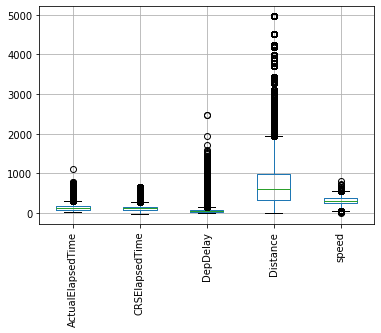

In [70]:
_= X_subset.boxplot(rot=90)

In [71]:
# crear noves columnes (FEATURE ENGINEERING)
X_subset['ElapseTime_difference']=X['ActualElapsedTime']-X_subset['CRSElapsedTime']

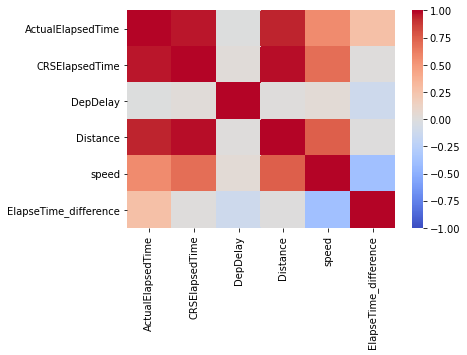

In [72]:
corr = X_subset.corr()
sns.heatmap(corr,cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
df_final = pd.concat([X_subset,target],axis=1)
df_final.head()

,ActualElapsedTime,CRSElapsedTime,DepDelay,Distance,speed,ElapseTime_difference,ArrDelay
0,90.0,90.0,34.0,515,343.333333,0.0,34.0
1,240.0,250.0,67.0,1591,397.750000,-10.0,57.0
2,121.0,135.0,94.0,828,410.578512,-14.0,80.0
3,228.0,240.0,27.0,1489,391.842105,-12.0,15.0
4,123.0,135.0,28.0,838,408.780488,-12.0,16.0


In [76]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_final),columns=df_final.columns)

In [77]:
df_scaler.head()

,ActualElapsedTime,CRSElapsedTime,DepDelay,Distance,speed,ElapseTime_difference,ArrDelay
0,-0.627764,-0.600737,-0.428886,-0.405151,0.465420,-0.189924,-0.482131
1,1.447083,1.700407,0.122323,1.518473,1.069368,-0.715401,-0.103551
2,-0.198963,0.046460,0.573312,0.154416,1.211747,-0.925592,0.275030
3,1.281095,1.556586,-0.545810,1.336122,1.003799,-0.820497,-0.794871
4,-0.171298,0.046460,-0.529106,0.172293,1.191791,-0.820497,-0.778411


In [83]:
df_scaler.std()

ActualElapsedTime        1.0
CRSElapsedTime           1.0
DepDelay                 1.0
Distance                 1.0
speed                    1.0
ElapseTime_difference    1.0
ArrDelay                 1.0
dtype: float64

In [84]:
df_scaler.mean()

ActualElapsedTime        3.077735e-15
CRSElapsedTime           1.316170e-15
DepDelay                 6.542870e-16
Distance                -1.589521e-14
speed                    2.909207e-15
ElapseTime_difference   -1.947968e-14
ArrDelay                 1.457600e-15
dtype: float64

<AxesSubplot:xlabel='ArrDelay', ylabel='Count'>

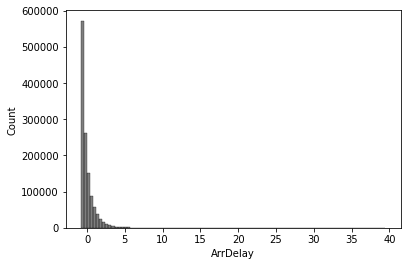

In [85]:
sns.histplot(df_scaler['ArrDelay'],color='black',alpha=0.5,bins=100)

(-1.0, 1.0)

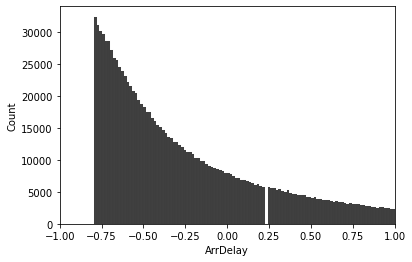

In [86]:
sns.histplot(df_scaler['ArrDelay'],color='black')
plt.xlim([-1,1])

In [88]:
X_final = df_scaler.drop('ArrDelay',axis=1)
y_final = df_scaler['ArrDelay']

X_train_final,X_test_final,y_train_final, y_test_final = train_test_split(X_final,y_final,test_size=0.3)

In [90]:
X_train_final.shape,y_train_final.shape

((873179, 6), (873179,))

In [92]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train_final,y_train_final)
    y_pred = model.predict(X_test_final)    
    R2 = r2_score(y_test_final,y_pred) 
    mse = MSE(y_test_final,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

modelo: LinearRegression() R2 score: 0.9999999971086486, MSE: 2.8959445455806176e-09
modelo: Lasso(alpha=1e-08) R2 score: 0.9999999748521599, MSE: 2.518778933378142e-08
modelo: DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) R2 score: 0.9979744914881571, MSE: 0.0020287261842833818


+ R2 score se mantien igual pero MSE baja

### Nivell 3


# Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [93]:
df= df_final.drop('DepDelay',axis=1)
X,y = df.drop('ArrDelay',axis=1), df['ArrDelay']


X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3)
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    R2 = r2_score(y_test,y_pred) 
    mse = MSE(y_test,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

modelo: LinearRegression() R2 score: 0.04854262470015036, MSE: 3525.2185915618193


/home/vant/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18960995.027397633, tolerance: 321759.16891871253
  model = cd_fast.enet_coordinate_descent(


modelo: Lasso(alpha=1e-08) R2 score: 0.04854262470008597, MSE: 3525.2185915620585
modelo: DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) R2 score: 0.08056156009362814, MSE: 3406.5861133643252


+ el resultat final empitjora molt